In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
pd.set_option('max_colwidth', 800)
import seaborn as sns
sns.set_theme(style="whitegrid")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
review_beauty_df = pd.read_json('/content/drive/MyDrive/capstone_project/reviews_Beauty_5.json.gz', orient='records', lines=True)
review_beauty_df.shape

(198502, 9)

In [ ]:
review_beauty_df.dtypes

reviewerID        object
asin              object
reviewerName      object
helpful           object
reviewText        object
overall            int64
summary           object
unixReviewTime     int64
reviewTime        object
dtype: object

In [ ]:
print("Total number of words there in the text beauty categories reviews : ",review_beauty_df["reviewText"].apply(lambda x:len(x.split(" "))).sum())

Total number of words there in the text beauty categories reviews :  17881008


In [ ]:
from nltk.corpus import stopwords
special_character_remover = re.compile('[/(){}\[\]\|@,;]')
extra_symbol_remover = re.compile('[^0-9a-z #+_]')   # " ^ " is negation 
STOPWORDS = set(stopwords.words('english'))

In [ ]:
def clean_text(text):
    text = text.lower()
    text = special_character_remover.sub(' ', text)
    text = extra_symbol_remover.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

In [ ]:
review_beauty_df["reviewText"]= review_beauty_df["reviewText"].apply(clean_text)

In [ ]:
print("Total number of words there in the text beauty categories reviews  after Text preprocessing: ",review_beauty_df["reviewText"].apply(lambda x:len(x.split(" "))).sum())

Total number of words there in the text beauty categories reviews  after Text preprocessing:  8913436


In [ ]:
beauty=review_beauty_df[["reviewText","summary","asin"]]

In [ ]:
beauty["combined_text"]=beauty["reviewText"]+" "+beauty["summary"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
recom=[]
for i in review_beauty_df["overall"]:
  if(i<=2):
    recom.append("NOT RECOMMENDED")
  else:
    recom.append("RECOMMENDED")

In [ ]:
beauty["decision"]=recom

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
beauty

,reviewText,summary,asin,combined_text,decision
0,oily creamy expected ordered try highlight contour looked awful plus took forever arrive,Don't waste your money,7806397051,oily creamy expected ordered try highlight contour looked awful plus took forever arrive Don't waste your money,NOT RECOMMENDED
1,palette decent price looking different shades palette conceals decently however somewhat cake crease,OK Palette!,7806397051,palette decent price looking different shades palette conceals decently however somewhat cake crease OK Palette!,RECOMMENDED
2,texture concealer pallet fantastic great coverage wide variety uses guess meant professional makeup artists lot colours use use least two regular basis two occasionally reason im giving stars feel like range colors kind waste product wonderful cakey gives natural concealed imperfections therefore highly recommend,great quality,7806397051,texture concealer pallet fantastic great coverage wide variety uses guess meant professional makeup artists lot colours use use least two regular basis two occasionally reason im giving stars feel like range colors kind waste product wonderful cakey gives natural concealed imperfections therefore highly recommend great quality,RECOMMENDED
3,really cant tell exactly thing powder kind oilish pasty fluid far tried twice doesnt really show color face,Do not work on my face,7806397051,really cant tell exactly thing powder kind oilish pasty fluid far tried twice doesnt really show color face Do not work on my face,NOT RECOMMENDED
4,little smaller expected okay lasted long time think great coverage price paid heavy wears within 301hr kinda dries skin id recommend people looking cheap coverage beginners learning conceal,It's okay.,7806397051,little smaller expected okay lasted long time think great coverage price paid heavy wears within 301hr kinda dries skin id recommend people looking cheap coverage beginners learning conceal It's okay.,RECOMMENDED
...,...,...,...,...,...
198497,little dab shea butter need scrape small piece size fingernail im guy nails arent big roll around hands warm soften rub dry areas skin since creates kind waxy barrier good idea right stepping shower hold moisture already wet skinmy wife put much first kids laughed good time trying rub onto arms dry skin guess thereanyway quality fragrance product good entire pound shea butter probably last long time seems like good value mei received item review,A little dab...,B00LLPT4HI,little dab shea butter need scrape small piece size fingernail im guy nails arent big roll around hands warm soften rub dry areas skin since creates kind waxy barrier good idea right stepping shower hold moisture already wet skinmy wife put much first kids laughed good time trying rub onto arms dry skin guess thereanyway quality fragrance product good entire pound shea butter probably last long time seems like good value mei received item review A little dab...,RECOMMENDED
198498,shea butter completely raw unrefined retains delightful nutty fragrance subtle yellow color natural texture pure organic shea butter natural luxury quite different homogenized overprocessed commercial products contain small percentage chemicallyrefined shea oilshea nuts unique species tree lives two hundred years vitellaria paradoxa nuts contain rich complex five different fatty acids good skin palmitic stearic oleic linoleic arachidic particular shea butter imported ghana women gather nuts wild trees shell roast extract oils hand smells delicious indeed used food africa well source incomeit solidmdash hardmdash room temperature liquefies body temperature easy apply quickly absorbed skin improves texture dry skin makes look better like apply bathingbeauty shea provided sample evaluatio...,Pure organic raw shea butter,B00LLPT4HI,shea butter completely raw unrefined retains delightful nutty fragrance subtle yellow color natural texture pure organic shea butter natural luxury quite different homogenized overprocessed commercial products cont

In [ ]:
#pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
def gettextpolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
from pandas.compat import pa_version_under2p0
polarity=[]
sentiment=[]
target=[]
for i in beauty["combined_text"]:
  p=gettextpolarity(i)
  polarity.append(p)
  if p<-0.5:
    sentiment.append("Strongly_Negative")
    target.append(1)
  elif p>=-0.5 and p<0.0:
    sentiment.append("Negative")
    target.append(2)
  elif p==0:
    sentiment.append("Neutal")
    target.append(3)
  elif p>0.0 and p<=0.5:
    sentiment.append("Positive")
    target.append(4)
  else:
    sentiment.append("Stongly_Positive")
    target.append(5)


In [ ]:
beauty["polarity"]=polarity
beauty["sentiment"]=sentiment
beauty["overall"]=review_beauty_df["overall"]
beauty["target"]=target

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
beauty.head()

,reviewText,summary,asin,combined_text,decision,polarity,sentiment,overall,target
0,oily creamy expected ordered try highlight contour looked awful plus took forever arrive,Don't waste your money,7806397051,oily creamy expected ordered try highlight contour looked awful plus took forever arrive Don't waste your money,NOT RECOMMENDED,-0.433333,Negative,1,2
1,palette decent price looking different shades palette conceals decently however somewhat cake crease,OK Palette!,7806397051,palette decent price looking different shades palette conceals decently however somewhat cake crease OK Palette!,RECOMMENDED,0.239583,Positive,3,4
2,texture concealer pallet fantastic great coverage wide variety uses guess meant professional makeup artists lot colours use use least two regular basis two occasionally reason im giving stars feel like range colors kind waste product wonderful cakey gives natural concealed imperfections therefore highly recommend,great quality,7806397051,texture concealer pallet fantastic great coverage wide variety uses guess meant professional makeup artists lot colours use use least two regular basis two occasionally reason im giving stars feel like range colors kind waste product wonderful cakey gives natural concealed imperfections therefore highly recommend great quality,RECOMMENDED,0.258462,Positive,4,4
3,really cant tell exactly thing powder kind oilish pasty fluid far tried twice doesnt really show color face,Do not work on my face,7806397051,really cant tell exactly thing powder kind oilish pasty fluid far tried twice doesnt really show color face Do not work on my face,NOT RECOMMENDED,0.225000,Positive,2,4
4,little smaller expected okay lasted long time think great coverage price paid heavy wears within 301hr kinda dries skin id recommend people looking cheap coverage beginners learning conceal,It's okay.,7806397051,little smaller expected okay lasted long time think great coverage price paid heavy wears within 301hr kinda dries skin id recommend people looking cheap coverage beginners learning conceal It's okay.,RECOMMENDED,0.184722,Positive,3,4


In [ ]:
beauty["sentiment"].value_counts()

Positive             158710
Stongly_Positive      22255
Negative              15105
Neutal                 1972
Strongly_Negative       460
Name: sentiment, dtype: int64

In [ ]:
beauty["overall"].value_counts()

5    114531
4     39741
3     22248
2     11456
1     10526
Name: overall, dtype: int64

In [ ]:
beauty.head()

,reviewText,summary,asin,combined_text,decision,polarity,sentiment,overall,target
0,oily creamy expected ordered try highlight contour looked awful plus took forever arrive,Don't waste your money,7806397051,oily creamy expected ordered try highlight contour looked awful plus took forever arrive Don't waste your money,NOT RECOMMENDED,-0.433333,Negative,1,2
1,palette decent price looking different shades palette conceals decently however somewhat cake crease,OK Palette!,7806397051,palette decent price looking different shades palette conceals decently however somewhat cake crease OK Palette!,RECOMMENDED,0.239583,Positive,3,4
2,texture concealer pallet fantastic great coverage wide variety uses guess meant professional makeup artists lot colours use use least two regular basis two occasionally reason im giving stars feel like range colors kind waste product wonderful cakey gives natural concealed imperfections therefore highly recommend,great quality,7806397051,texture concealer pallet fantastic great coverage wide variety uses guess meant professional makeup artists lot colours use use least two regular basis two occasionally reason im giving stars feel like range colors kind waste product wonderful cakey gives natural concealed imperfections therefore highly recommend great quality,RECOMMENDED,0.258462,Positive,4,4
3,really cant tell exactly thing powder kind oilish pasty fluid far tried twice doesnt really show color face,Do not work on my face,7806397051,really cant tell exactly thing powder kind oilish pasty fluid far tried twice doesnt really show color face Do not work on my face,NOT RECOMMENDED,0.225000,Positive,2,4
4,little smaller expected okay lasted long time think great coverage price paid heavy wears within 301hr kinda dries skin id recommend people looking cheap coverage beginners learning conceal,It's okay.,7806397051,little smaller expected okay lasted long time think great coverage price paid heavy wears within 301hr kinda dries skin id recommend people looking cheap coverage beginners learning conceal It's okay.,RECOMMENDED,0.184722,Positive,3,4


In [ ]:
def lemma_c(corpus):
  import nltk
  nltk.download('wordnet')
  from nltk.stem import WordNetLemmatizer
  lemmmatizer = WordNetLemmatizer()
  return [' '.join([lemmmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

In [ ]:
import nltk
nltk.download('omw-1.4')
lemmatized = lemma_c(beauty["combined_text"])

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
beauty["lemmatized"]=lemmatized

In [ ]:
beauty.head()

,reviewText,summary,asin,combined_text,decision,polarity,sentiment,overall,target,lemmatized
0,oily creamy expected ordered try highlight contour looked awful plus took forever arrive,Don't waste your money,7806397051,oily creamy expected ordered try highlight contour looked awful plus took forever arrive Don't waste your money,NOT RECOMMENDED,-0.433333,Negative,1,2,oily creamy expected ordered try highlight contour looked awful plus took forever arrive Don't waste your money
1,palette decent price looking different shades palette conceals decently however somewhat cake crease,OK Palette!,7806397051,palette decent price looking different shades palette conceals decently however somewhat cake crease OK Palette!,RECOMMENDED,0.239583,Positive,3,4,palette decent price looking different shade palette conceals decently however somewhat cake crease OK Palette!
2,texture concealer pallet fantastic great coverage wide variety uses guess meant professional makeup artists lot colours use use least two regular basis two occasionally reason im giving stars feel like range colors kind waste product wonderful cakey gives natural concealed imperfections therefore highly recommend,great quality,7806397051,texture concealer pallet fantastic great coverage wide variety uses guess meant professional makeup artists lot colours use use least two regular basis two occasionally reason im giving stars feel like range colors kind waste product wonderful cakey gives natural concealed imperfections therefore highly recommend great quality,RECOMMENDED,0.258462,Positive,4,4,texture concealer pallet fantastic great coverage wide variety us guess meant professional makeup artist lot colour use use least two regular basis two occasionally reason im giving star feel like range color kind waste product wonderful cakey give natural concealed imperfection therefore highly recommend great quality
3,really cant tell exactly thing powder kind oilish pasty fluid far tried twice doesnt really show color face,Do not work on my face,7806397051,really cant tell exactly thing powder kind oilish pasty fluid far tried twice doesnt really show color face Do not work on my face,NOT RECOMMENDED,0.225000,Positive,2,4,really cant tell exactly thing powder kind oilish pasty fluid far tried twice doesnt really show color face Do not work on my face
4,little smaller expected okay lasted long time think great coverage price paid heavy wears within 301hr kinda dries skin id recommend people looking cheap coverage beginners learning conceal,It's okay.,7806397051,little smaller expected okay lasted long time think great coverage price paid heavy wears within 301hr kinda dries skin id recommend people looking cheap coverage beginners learning conceal It's okay.,RECOMMENDED,0.184722,Positive,3,4,little smaller expected okay lasted long time think great coverage price paid heavy wear within 301hr kinda dry skin id recommend people looking cheap coverage beginner learning conceal It's okay.


In [ ]:
""" Lipstick, kajal, liner, eyeliner, eyeshadow, mascara, concealer, bronzer, primer, face serum, hair serum, lip liner, lip balm, foundation blush, highlighter, compact, makeup blender, puff, brush """

' Lipstick, kajal, liner, eyeliner, eyeshadow, mascara, concealer, bronzer, primer, face serum, hair serum, lip liner, lip balm, foundation blush, highlighter, compact, makeup blender, puff, brush '

In [ ]:
len(beauty["asin"].unique()) # no. products   

12101

In [ ]:
product=[]
review=[]
for i in beauty["lemmatized"]:
  if "hair" in i:
    product.append("Hair_Care_Product")
    review.append(i)
  elif "perfume" in i:
      product.append("Fragrance_Product")
      review.append(i)   
  elif "makeup" in i:
      product.append("Make-up")
      review.append(i)
  elif "Manicure" in i:
      product.append("Manicure & Pedicure")
      review.append(i)
  elif "Skin" in i:
      product.append("Skin_Care_Product")
      review.append(i)
  elif "shades" in i:
      product.append("Painting_Product")
      review.append(i)    
  elif "face" in i:
    product.append("Face_Product")
    review.append(i)
  elif "lip" in i:
    product.append("Lip_Care_Product")
    review.append(i)
  elif "kajal" in i :
    product.append("kajal")
    review.append(i)  
  elif "eye" in i :
    product.append("eye_care_products")
    review.append(i)
  elif "brush" in i :
    product.append("beauty_tools")
    review.append(i) 
  elif "skin" in i :
    product.append("skin_care_product")
    review.append(i)  

In [ ]:
final=pd.DataFrame()

In [ ]:
beauty.head(1)

,reviewText,summary,asin,combined_text,decision,polarity,sentiment,overall,target,lemmatized
0,oily creamy expected ordered try highlight contour looked awful plus took forever arrive,Don't waste your money,7806397051,oily creamy expected ordered try highlight contour looked awful plus took forever arrive Don't waste your money,NOT RECOMMENDED,-0.433333,Negative,1,2,oily creamy expected ordered try highlight contour looked awful plus took forever arrive Don't waste your money


In [ ]:
product=[]
review=[]
product_id=[]
for j in beauty["asin"].unique()[:500]:                     #vgames_review_df[vgames_review_df['asin']==j]['reviewText']
  for i in beauty[beauty['asin']==j]['lemmatized']:
    if "hair" in i:
      product.append("Hair_Care_Product")
      review.append(i)
      product_id.append(j)
    elif "perfume" in i:
        product.append("Fragrance_Product")
        review.append(i)
        product_id.append(j)   
    elif "makeup" in i:
        product.append("Make-up")
        review.append(i)
        product_id.append(j)
    elif "Manicure" in i:
        product.append("Manicure & Pedicure")
        review.append(i)
        product_id.append(j)
    elif "Skin"  in i and "face" in i:
        product.append("Face_Care_Product")
        review.append(i)
        product_id.append(j)
    elif "shades" in i:
        product.append("Painting_Product")
        review.append(i)
        product_id.append(j)    
    elif "face" in i:
      product.append("Face_Product")
      review.append(i)
      product_id.append(j)
    elif "lip" in i:
      product.append("Lip_Care_Product")
      review.append(i)
      product_id.append(j)
    elif "kajal" in i :
      product.append("kajal")
      review.append(i)
      product_id.append(j)  
    elif "eye" in i :
      product.append("eye_care_products")
      review.append(i)
      product_id.append(j)
    elif "brush" in i :
      product.append("beauty_tools")
      review.append(i)
      product_id.append(j) 
    elif "skin" in i :
      product.append("skin_care_product")
      review.append(i)
      product_id.append(j)  

In [ ]:
final=pd.DataFrame()

In [ ]:
final["review"]=review
final["product"]=product
final["product_id"]=product_id
#final["target"]=target

In [ ]:
final["product"].value_counts()

Hair_Care_Product      1695
skin_care_product      1661
Face_Product           1306
Make-up                 592
eye_care_products       399
Fragrance_Product       237
Lip_Care_Product        200
beauty_tools            156
Face_Care_Product        28
Manicure & Pedicure       2
Name: product, dtype: int64

In [ ]:
final[final["product"]=="Manicure & Pedicure"]

,review,product,product_id
3643,ordered polish salon used call american manicure pink traditional french manicure first coat polish streaked badly polish thick couldnt get second coat nail kept adding polish thinner quite lot ultimately get thinner texture still streaked first coat well second coat put polish away day decided give one try giving time polish didnt streak one thin carefully applied coat exactly color wanted one coat good top coat natural looking manicureafter lot frustration adding thinner get right texture time letting polish meld thinner color texture polish wanted use bottle polish long start streaking im unsure purchase another bottle Princess Pink $518 (Sheer French Manicure),Manicure & Pedicure,B000142C1A
3684,love create twist otherwise boring french manicure instead using white toe finger tip use dark color like one color work opi lincoln park midnight sephora im brad sephora 212 add translucent sparkle glaze like sally hansen diamond go soccer mom sexy mama color cherry chutney dark reddish purple wear well toe easy touch chip salon add flower gorgeous love Sexy French Manicure,Manicure & Pedicure,B000142FVW


In [ ]:
face=final[final["product"]=="beauty_tools"]
face

,review,product,product_id
608,product def kill two bird one stone 27 wrinkle consciousness still outgrown occasional adolescent breakout used everything dermatologic philosophy etc proactive murad drugstore clarisonic brush work better AWESOME COMBO,beauty_tools,B000052YOL
806,choosing skin care product usually follow recommendation fromthe skin type solutionor paula begounsdont go cosmetic counter without dont go cosmetic counter without product one paulas pick overall excellent product decided try needed pick new cleanseri sensitive skin burn slightly first time used since fine also work great clarisonic brushsince writing review amazon isnt including ingredient list product wanted include herewater glycerin caprylic capric triglyceride cetyl ricinoleate isohexadecane teacocoyl glutamate methyl glucose sesquistearate stearyl alcohol cetyl alcohol peg40 hydrogenated castor oil peg20 methyl glucose sesquistearate bisabolol anthemis nobilis flower extract tocopheryl acetate dipotassium glycyrrhizate stearyl glycyrrhetinate tetrasodium edta acrylate c1030 alky...,beauty_tools,B000052ZB2
837,love love love cleanser im changing product time see find better fit always come back cleanser feel sooo good combination acne prone skin doesnt dry however feel clean well like leave mask time brush teeth 5 min rinse skin feel amazing there light tingling feeling incredible deep clean sensation say contains beta hydroxy im guessing acting little kind like light peeling refreshing complexion every time MY FAVORITE!!!,beauty_tools,B000052ZB4
854,wife like mascara thickens lengthens without clumping favorite mascara one good also like washable easily removedshe doesnt care brush much others tried live one issue frustrates though brush short cannot reach bottom tube feel cannot use mascara availableshe rate 5 star would buy posted photo information A good mascara that lengthens and thickens and can be easily removed!,beauty_tools,B000052ZBH
869,wife used qtips swab many year never problem way work come apart unravel normal usage includes using item small paint brush cleaning tool small object qtips swab always worked fine swab,beauty_tools,B00005304H
...,...,...,...
5570,tried lot glue one work best even brush bond quickly easily easy apply le mess I would recommend,beauty_tools,B00027D8IC
5808,pupps sorry ive bad husband putting steroid cream turned around actually cry midwife one checkup called doctor didnt realize left door open crack heard say ive never seen bad ever yeah bad last week deliver mine didnt know doula told end im glad didnt get induced early certainly considered lot oral steroid held week 38 wasnt sleeping much much choice help ton soap helped although terribly drying use rich bath oil cream afterwards sleep hour actually would take hot bath scrubbing brush soap would make itch worse theory much histamine released body fight hour least able sleep dont recommend unless youre lose tentative grip reality steroid cream really nothing make husband cry lol oral steroid amazing im glad waited long dd ill effect also scarring despite itching sleep wherever could rea...,beauty_tools,B00028LN1K
6032,hold promise smoothes rigdes provides smooth matte base nail polish applied good brush Good base coat,beauty_tools,B0002DLEJG
6035,many mac single wonderful texture one whole middle quite hard brush doesnt pick color around edge great nice smooth blend well good shimmer glittery color little yellow super pale skin though gold hoping youre pale redhead maybe find warmer gold tone Consistency Issues,beauty_tools,B0002DNZAC


In [ ]:
face["product_id"].mode()

0    B0001EL658
dtype: object

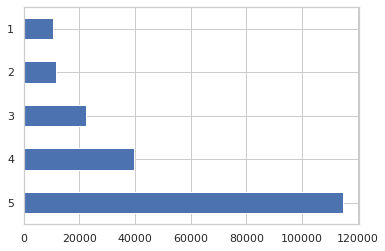

In [ ]:
import matplotlib.pyplot as plt
ax=beauty["overall"].value_counts(sort=True).plot(kind="barh")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


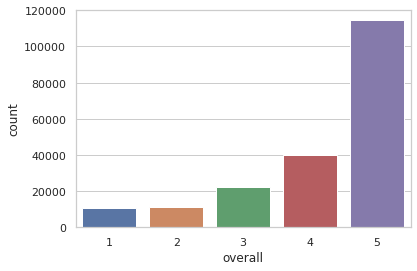

In [ ]:
sns.countplot(beauty["overall"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


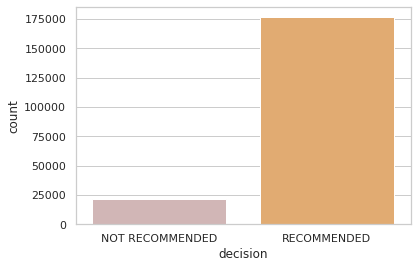

In [ ]:
import seaborn as sns
sns.countplot(beauty["decision"],palette= (["#D6B2B1","#F3AB60"]))

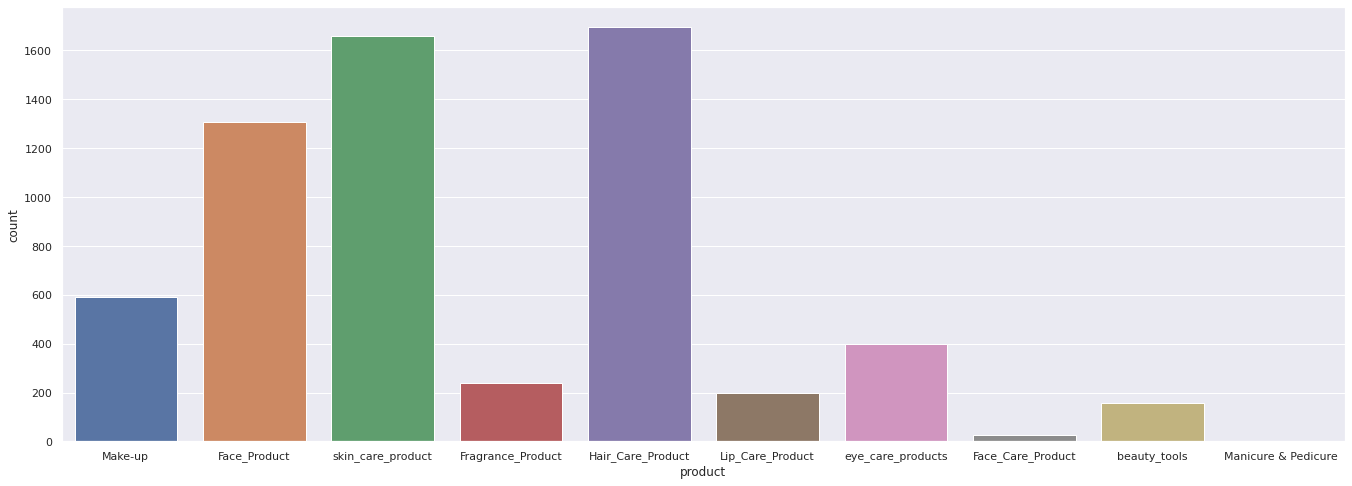

In [ ]:
from matplotlib.figure import Figure
sns.set_theme(style="whitegrid")
sns.set(rc= {"figure.figsize": (23, 8)}) 
ax = sns.countplot(x="product", data=final)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


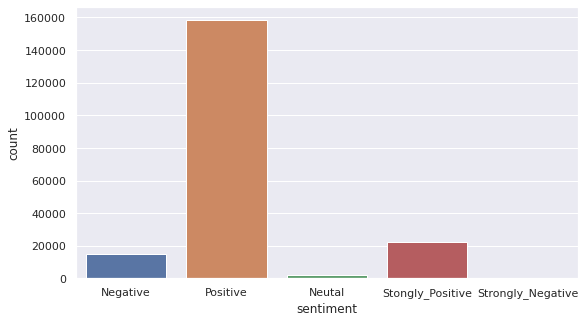

In [ ]:
sns.set(rc= {"figure.figsize": (9, 5)}) 
sns.countplot(beauty["sentiment"])


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 8.1 MB/s 
     |████████████████████████████████| 6.6 MB 57.3 MB/s 
     |████████████████████████████████| 120 kB 71.3 MB/s 


In [ ]:
'''!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html'''

'!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html'

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification # autotokenizer willl take text and convert into number 
import torch

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [ ]:
'''def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1'''

"def sentiment_score(review):\n    tokens = tokenizer.encode(review, return_tensors='pt')\n    result = model(tokens)\n    return int(torch.argmax(result.logits))+1"

In [ ]:
beauty.head(1)

,reviewText,summary,asin,combined_text,decision,polarity,sentiment,overall,target,lemmatized
0,oily creamy expected ordered try highlight contour looked awful plus took forever arrive,Don't waste your money,7806397051,oily creamy expected ordered try highlight contour looked awful plus took forever arrive Don't waste your money,NOT RECOMMENDED,-0.433333,Negative,1,2,oily creamy expected ordered try highlight contour looked awful plus took forever arrive Don't waste your money


In [ ]:
beauty['reviewTime']=review_beauty_df['reviewTime']

In [ ]:
beauty['reviewTime'] = pd.to_datetime(beauty['reviewTime'])
beauty

,reviewText,summary,asin,combined_text,decision,polarity,sentiment,overall,target,lemmatized,reviewTime
0,oily creamy expected ordered try highlight contour looked awful plus took forever arrive,Don't waste your money,7806397051,oily creamy expected ordered try highlight contour looked awful plus took forever arrive Don't waste your money,NOT RECOMMENDED,-0.433333,Negative,1,2,oily creamy expected ordered try highlight contour looked awful plus took forever arrive Don't waste your money,2014-01-30
1,palette decent price looking different shades palette conceals decently however somewhat cake crease,OK Palette!,7806397051,palette decent price looking different shades palette conceals decently however somewhat cake crease OK Palette!,RECOMMENDED,0.239583,Positive,3,4,palette decent price looking different shade palette conceals decently however somewhat cake crease OK Palette!,2014-04-18
2,texture concealer pallet fantastic great coverage wide variety uses guess meant professional makeup artists lot colours use use least two regular basis two occasionally reason im giving stars feel like range colors kind waste product wonderful cakey gives natural concealed imperfections therefore highly recommend,great quality,7806397051,texture concealer pallet fantastic great coverage wide variety uses guess meant professional makeup artists lot colours use use least two regular basis two occasionally reason im giving stars feel like range colors kind waste product wonderful cakey gives natural concealed imperfections therefore highly recommend great quality,RECOMMENDED,0.258462,Positive,4,4,texture concealer pallet fantastic great coverage wide variety us guess meant professional makeup artist lot colour use use least two regular basis two occasionally reason im giving star feel like range color kind waste product wonderful cakey give natural concealed imperfection therefore highly recommend great quality,2013-09-06
3,really cant tell exactly thing powder kind oilish pasty fluid far tried twice doesnt really show color face,Do not work on my face,7806397051,really cant tell exactly thing powder kind oilish pasty fluid far tried twice doesnt really show color face Do not work on my face,NOT RECOMMENDED,0.225000,Positive,2,4,really cant tell exactly thing powder kind oilish pasty fluid far tried twice doesnt really show color face Do not work on my face,2013-12-08
4,little smaller expected okay lasted long time think great coverage price paid heavy wears within 301hr kinda dries skin id recommend people looking cheap coverage beginners learning conceal,It's okay.,7806397051,little smaller expected okay lasted long time think great coverage price paid heavy wears within 301hr kinda dries skin id recommend people looking cheap coverage beginners learning conceal It's okay.,RECOMMENDED,0.184722,Positive,3,4,little smaller expected okay lasted long time think great coverage price paid heavy wear within 301hr kinda dry skin id recommend people looking cheap coverage beginner learning conceal It's okay.,2013-10-19
...,...,...,...,...,...,...,...,...,...,...,...
198497,little dab shea butter need scrape small piece size fingernail im guy nails arent big roll around hands warm soften rub dry areas skin since creates kind waxy barrier good idea right stepping shower hold moisture already wet skinmy wife put much first kids laughed good time trying rub onto arms dry skin guess thereanyway quality fragrance product good entire pound shea butter probably last long time seems like good value mei received item review,A little dab...,B00LLPT4HI,little dab shea butter need scrape small piece size fingernail im guy nails arent big roll around hands warm soften rub dry areas skin since creates kind waxy barrier good idea right stepping shower hold moisture already wet skinmy wife put much first kids laughed good time trying rub onto arms dry skin guess thereanyway quality fragrance product good entire pound shea butter probably last long time seems like good v

In [ ]:
#del review_b

In [ ]:
# Sorting the column based on time
review_b = beauty.sort_values(by='reviewTime')
review_b.head(1)

,reviewText,summary,asin,combined_text,decision,polarity,sentiment,overall,target,lemmatized,reviewTime
1837,ive using jasons products ten years one favorite hand soaps like unlike hand soaps doesnt dry skin also comforting ingredients like aloe lavender chamomile care things product doesnt contain petrolatum sodium lauryl laureth sulfates give try im sure love itthe rebecca review,Gentle Hand Soap,B0000535UX,ive using jasons products ten years one favorite hand soaps like unlike hand soaps doesnt dry skin also comforting ingredients like aloe lavender chamomile care things product doesnt contain petrolatum sodium lauryl laureth sulfates give try im sure love itthe rebecca review Gentle Hand Soap,RECOMMENDED,0.272222,Positive,5,4,ive using jason product ten year one favorite hand soap like unlike hand soap doesnt dry skin also comforting ingredient like aloe lavender chamomile care thing product doesnt contain petrolatum sodium lauryl laureth sulfate give try im sure love itthe rebecca review Gentle Hand Soap,2002-06-12


In [ ]:
'''review_b.to_csv(r'/content/drive/MyDrive/capstone_project/Beauty_data.csv', sep='\t', index=False,header=True)'''

In [ ]:
# Adding product id(asin) column
review_b['asin'] = review_beauty_df['asin']

In [ ]:
# Top 10 sold beauty products

review_b["asin"].value_counts()

B004OHQR1Q    431
B0043OYFKU    403
B0069FDR96    391
B000ZMBSPE    389
B00150LT40    329
             ... 
B005IMHDW8      5
B0065LOP1S      5
B002GZRZW8      5
B00C577B94      5
B0015YYYF2      5
Name: asin, Length: 12101, dtype: int64

In [ ]:
# set the tdate as the index
review_b = review_b.set_index("reviewTime")
review_b.head(3)

,reviewText,summary,asin,combined_text,decision,polarity,sentiment,overall,target,lemmatized
reviewTime,,,,,,,,,,
2002-06-12,ive using jasons products ten years one favorite hand soaps like unlike hand soaps doesnt dry skin also comforting ingredients like aloe lavender chamomile care things product doesnt contain petrolatum sodium lauryl laureth sulfates give try im sure love itthe rebecca review,Gentle Hand Soap,B0000535UX,ive using jasons products ten years one favorite hand soaps like unlike hand soaps doesnt dry skin also comforting ingredients like aloe lavender chamomile care things product doesnt contain petrolatum sodium lauryl laureth sulfates give try im sure love itthe rebecca review Gentle Hand Soap,RECOMMENDED,0.272222,Positive,5,4,ive using jason product ten year one favorite hand soap like unlike hand soap doesnt dry skin also comforting ingredient like aloe lavender chamomile care thing product doesnt contain petrolatum sodium lauryl laureth sulfate give try im sure love itthe rebecca review Gentle Hand Soap
2002-06-16,trying product husband noticed difference hair turned styling told buy product favoritethis product guaranteed add least 10 fullness hair first applicationit mild botanical cleansing agents fruit acids cleanses hair helps purify scalp polysorbates free scalp excess cellular debris block hair follicleshe doesnt use conditioner love usingit productthe rebecca review,Only shampoo my husband will use lately,B0000535UM,trying product husband noticed difference hair turned styling told buy product favoritethis product guaranteed add least 10 fullness hair first applicationit mild botanical cleansing agents fruit acids cleanses hair helps purify scalp polysorbates free scalp excess cellular debris block hair follicleshe doesnt use conditioner love usingit productthe rebecca review Only shampoo my husband will use lately,RECOMMENDED,0.126190,Positive,5,4,trying product husband noticed difference hair turned styling told buy product favoritethis product guaranteed add least 10 fullness hair first applicationit mild botanical cleansing agent fruit acid clean hair help purify scalp polysorbates free scalp excess cellular debris block hair follicleshe doesnt use conditioner love usingit productthe rebecca review Only shampoo my husband will use lately
2002-06-16,conditioner compliment thintothick shampoo really work also gives hair uv protectionthis conditioner also strengthen fine chemically processed hair infusing 22 amino acids also helps mend split ends prevent damagejasons exclusive hydrating complex planthenol3 tm aloe vera plus hairloving proteins seaweed extracts thicken hair fibers least 10lusture body manageabilitythe rebecca review,Good detangler,B0000535UN,conditioner compliment thintothick shampoo really work also gives hair uv protectionthis conditioner also strengthen fine chemically processed hair infusing 22 amino acids also helps mend split ends prevent damagejasons exclusive hydrating complex planthenol3 tm aloe vera plus hairloving proteins seaweed extracts thicken hair fibers least 10lusture body manageabilitythe rebecca review Good detangler,RECOMMENDED,0.143333,Positive,5,4,conditioner compliment thintothick shampoo really work also give hair uv protectionthis conditioner also strengthen fine chemically processed hair infusing 22 amino acid also help mend split end prevent damagejasons exclusive hydrating complex planthenol3 tm aloe vera plus hairloving protein seaweed extract thicken hair fiber least 10lusture body manageabilitythe rebecca review Good detangler


In [ ]:
review_b.sentiment.value_counts()

Positive             158710
Stongly_Positive      22255
Negative              15105
Neutal                 1972
Strongly_Negative       460
Name: sentiment, dtype: int64

In [ ]:
# fetching only negative sentiments 
review_b1 = review_b[(review_b.sentiment == 'Negative') | (review_b.sentiment == 'Neutal') | (review_b.sentiment == 'Strongly_Negative')]


In [ ]:
# fetching only positive sentiments 

'''review_b1 = review_b[(review_b.sentiment == 'Positive') | (review_b.sentiment == 'Stongly_Positive')]
'''

In [ ]:
review_b1 = review_b1[['target','overall','polarity']]

In [ ]:
# Converting the data to monthwise data

review_b1 = review_b1.resample('M').mean()
review_b1

,target,overall,polarity
reviewTime,,,
2004-04-30,2.000000,4.000000,-0.061465
2004-05-31,2.000000,4.500000,-0.010288
2004-06-30,NaN,NaN,NaN
2004-07-31,NaN,NaN,NaN
2004-08-31,NaN,NaN,NaN
...,...,...,...
2014-03-31,2.074408,2.766629,-0.123330
2014-04-30,2.091824,2.784906,-0.114544
2014-05-31,2.099596,2.808883,-0.121304


In [ ]:

# filling null values
review_b1["target"].fillna(review_b1["target"].mean(), inplace = True)

review_b1["overall"].fillna(review_b1["overall"].mean(), inplace = True)

review_b1["polarity"].fillna(review_b1["polarity"].mean(), inplace = True)


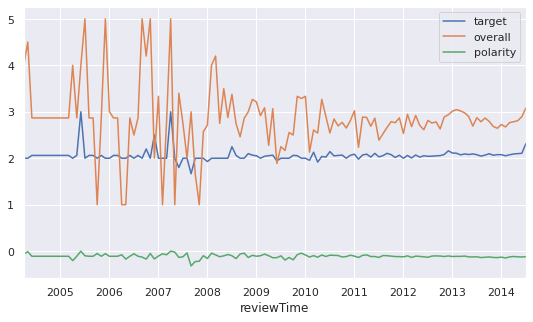

In [ ]:
review_b1.plot()

In [ ]:
review_b1 = review_b1['polarity']

In [ ]:
# import libraries
import numpy as np
import pandas as pd

import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# ACF and PACF charts
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# SARIMA/SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

# MSE/RMSE

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Ljung-Box test for model goodness
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

# import libraries
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

## For plotting
## For outliers detection
from sklearn import preprocessing, svm
## For stationarity test and decomposition
import statsmodels.tsa.api as smt
import statsmodels.api as sm

# dickey fuller test for stationarity
from statsmodels.tsa.stattools import acf,pacf,adfuller

from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

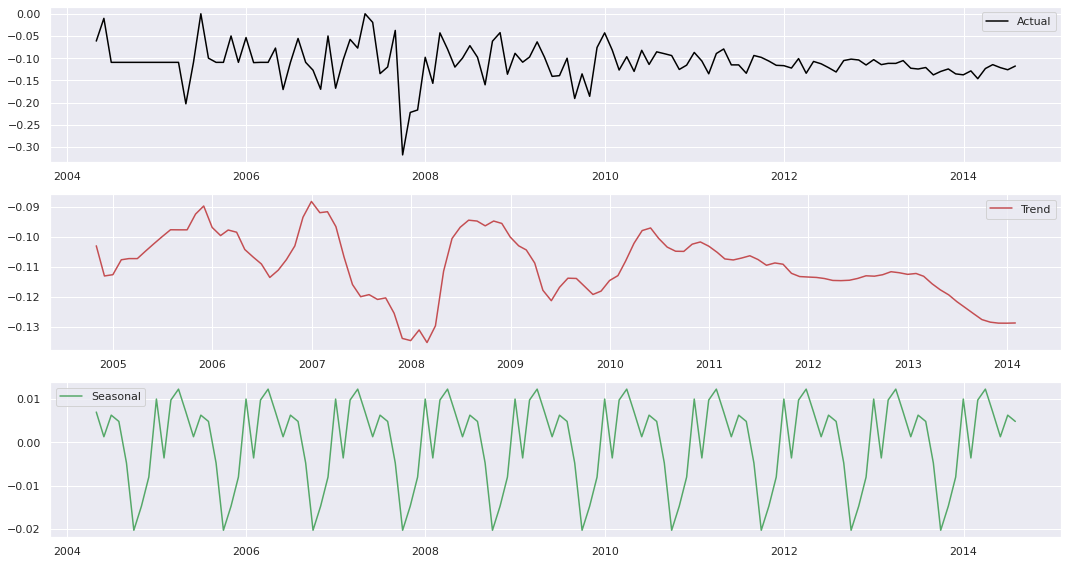

In [ ]:
# Decomposing the data
decomp = seasonal_decompose(review_b1,period=12)

d_sea = decomp.seasonal
d_tren = decomp.trend

fig,ax = plt.subplots(figsize = (15,8))

plt.subplot(311)
plt.plot(review_b1,label = 'Actual',color = 'black')
plt.legend()

plt.subplot(312)
plt.plot(d_tren,label = 'Trend',color = 'r')
plt.legend()

plt.subplot(313)
plt.plot(d_sea,label = 'Seasonal',color = 'g')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# check for Stationarity

def checkStationarity(data):
    pvalue = adfuller(data)[1]
    if pvalue < 0.05:
        ret = "Data is Stationary. Proceed to model building"
    else:
        ret = "Data is not Stationary. Make is stationary"
        
    return(ret)

In [ ]:
# check the data stationarity of the  data
checkStationarity(review_b1)

'Data is Stationary. Proceed to model building'

In [ ]:
# Making data stationary
review_b1 = review_b1 - review_b1.shift()

In [ ]:
# dropping null values

review_b1.dropna(inplace = True)

In [ ]:
# check the data stationarity of the "Inventories" data
checkStationarity(review_b1)

'Data is Stationary. Proceed to model building'

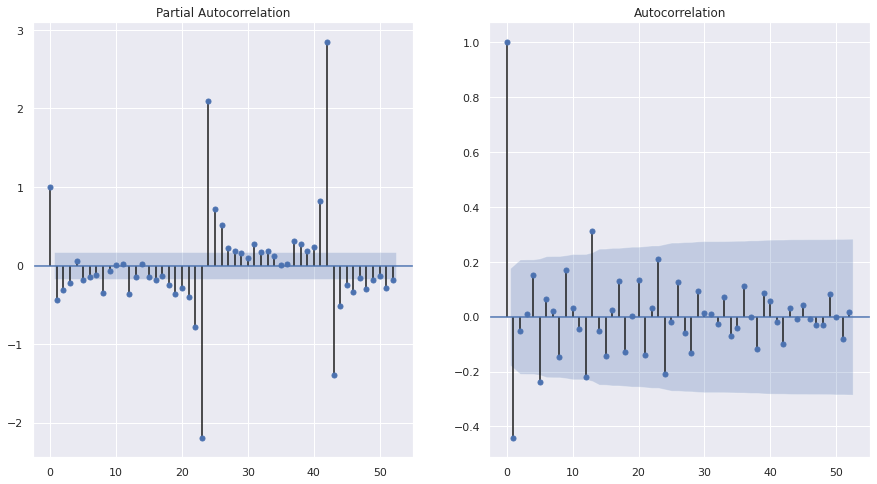

In [ ]:
# plotting using plot_acf function
fig,ax = plt.subplots(1,2,figsize = (15,8))

# PACF
plot_pacf(review_b1,lags=52,ax = ax[0])

#ACF
plot_acf(review_b1,lags=52,ax = ax[1])


plt.show()

In [ ]:
# Splitting the data
ratio = int(0.8*len(review_b1))
train = review_b1.iloc[:ratio]
test = review_b1.iloc[ratio:]

print(f'Train = {train.shape} | Test = {test.shape}')

Train = (98,) | Test = (25,)


In [ ]:
# build the SARIMA model with some initial values for p and q
p = np.arange(4)
q = np.arange(4)
    
models = []
p_l = []
q_l = []
mse = []
rmse =[]
mae = []
aic = []
bic = []
mad = []
mape = []
d = 0

In [ ]:
for i in p:
    for j in q:
         m = SARIMAX(train,order=(i,d,j),seasonal_order=(i,d,j,4)).fit()
         f = m.predict(start=len(train),end = len(train)+len(test)-1)
         aic.append(m.aic)
         bic.append(m.bic)
         mse.append(mean_squared_error(test,f))
         rmse.append(np.sqrt(mean_squared_error(test,f)))
         mae.append(mean_absolute_error(test,f))
         models.append(m)
         p_l.append(i)
         q_l.append(j)

In [ ]:
# creating list of p and q value combinations 
lis=[]
for p in range(3):
    for q in range(3):
        lis.append((p,2,q))

lis1=[]
for p in range(3):
    for q in range(3):
        lis1.append((p,2,q,12))

# building model
model=[]
for i,j in zip(lis,lis1):
    m = SARIMAX(train, order=i,seasonal_order=j).fit() 
    model.append(m)

# checking model is good or not
c=1
good_model =[]
for i in model:
    pvalue = sm.stats.acorr_ljungbox(i.resid, lags=[1], return_df=True)['lb_pvalue'].values
    if pvalue < 0.05:
        print(f'Model {c} Not a good model')
    else:
        good_model.append(i)
        print(f'Model {c} Good model')
    c+=1

Model 1 Not a good model
Model 2 Not a good model
Model 3 Not a good model
Model 4 Not a good model
Model 5 Not a good model
Model 6 Not a good model
Model 7 Not a good model
Model 8 Not a good model
Model 9 Not a good model


In [ ]:
# calculating AIC and BIC score
aic=[]
bic=[]
for i in good_model:
    aic.append(i.aic)
    bic.append(i.bic)

# predicting values
forecast=[]
for i in good_model:
    fcast = i.predict(start=len(train_mi_neg), end=len(train_mi_neg)+len(test_mi_neg)-1)
    forecast.append(fcast)

# calculating MSE and RMSE score
MSE = []
RMSE = []
for i in forecast:
    mse = mean_squared_error(test_mi_neg, i)
    rmse = np.sqrt(mse)
    MSE.append(mse)
    RMSE.append(rmse)

# appending model numbers 
model_no = ['Model '+str(i) for i in range(3,10)]

# dataframe of all results
df_results = pd.DataFrame({'Model No.': model_no, 
                           '(p, d, q)':lis[2:], 
                           'AIC': aic, 'BIC': bic, 'MSE': MSE, 'RMSE': RMSE})
df_results

In [ ]:
### Building the model with least error rate
p = 1; d= 2; q=1

sarima = SARIMAX(review_b1,order=(p,d,q),seasonal_order=(p,d,q,4)).fit()
sarima_pred = sarima.predict(start=len(train),end = len(train)+len(test)-1)
sarima_pred

reviewTime
2012-07-31   -0.038970
2012-08-31    0.012679
2012-09-30    0.005985
2012-10-31    0.011136
2012-11-30   -0.012552
2012-12-31    0.028257
2013-01-31   -0.004222
2013-02-28   -0.014047
2013-03-31   -0.017587
2013-04-30    0.024810
2013-05-31   -0.006947
2013-06-30   -0.004093
2013-07-31   -0.011605
2013-08-31    0.008052
2013-09-30   -0.024515
2013-10-31   -0.002301
2013-11-30    0.019722
2013-12-31   -0.013283
2014-01-31   -0.006002
2014-02-28    0.016876
2014-03-31   -0.012394
2014-04-30   -0.008074
2014-05-31    0.032540
2014-06-30   -0.004638
2014-07-31    0.006478
Freq: M, Name: predicted_mean, dtype: float64

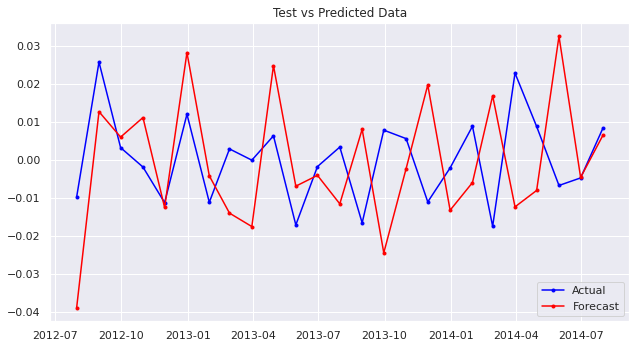

In [ ]:
#fig,ax = plt.subplots(figsize = (15,8))

plt.subplot(111)
plt.plot(test,marker = '.',c = 'blue', label = 'Actual')
plt.plot(sarima_pred,marker = '.',c = 'red', label = 'Forecast')
plt.title('Test vs Predicted Data')


plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
sarima_fore = sarima.predict(start = len(train),end = len(train)+len(test)+20)
sarima_fore = sarima_fore.tail(21)

In [ ]:
#index_of_fc = pd.date_range(review_b1.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')
index_of_fc= pd.date_range(start=test.index[-1], periods =21, freq='M')
index_of_fc

DatetimeIndex(['2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31',
               '2014-11-30', '2014-12-31', '2015-01-31', '2015-02-28',
               '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30',
               '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29',
               '2016-03-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
### Comparing all the models based on visuals

#fig,ax = plt.subplots(figsize = (12,5))

plt.subplot(111)
plt.plot(test,marker = '.',c = 'blue',label = 'Actual')
plt.plot(index_of_fc,sarima_fore,marker = '.',c = 'red',label='Prediction')
#plt.plot(sarima_pred,marker = '.',c = 'red',  label='Prediction')

#plt.plot(sarimax_pred,marker = '.',c = 'blue',label = 'SARIMAX')
plt.title('Time Series Analysis of Beauty Product data for Negative Reviews')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Polarity Score')

plt.tight_layout()
plt.show()